In [1]:
import os
from config import LR, NUM_EPOCHS, RANDOM_STATE, TEST_PATH, TRAIN_PATH
from data_and_preprocessors.data import load_data
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

PYTHONPATH: ./src


# Обзор данных

In [2]:
# Load data
from src.data_and_preprocessors.data import load_data
test_data, train_data, target_data, idx = load_data(TEST_PATH=TEST_PATH, TRAIN_PATH=TRAIN_PATH)
df = train_data.copy()
df['loan_status'] = target_data.values
print('train shape:', df.shape)
display(df.head(3))
display(df.describe(include='all'))

train shape: (58265, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58265.000000,5.826500e+04,58265,58265.000000,58265,58265,58265.000000,58265.000000,58265.000000,58265,58265.000000,58265.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,30321,NaN,12207,20914,NaN,NaN,NaN,49626,NaN,NaN
mean,27.498086,6.417901e+04,NaN,4.706908,NaN,NaN,9173.898172,10.670600,0.157552,NaN,5.790921,0.139243
std,5.849402,3.795707e+04,NaN,3.957176,NaN,NaN,5530.192773,3.034371,0.088814,NaN,3.976173,0.346203
min,20.000000,4.200000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,NaN,2.000000,0.000000
25%,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,0.000000
50%,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.740000,0.140000,NaN,4.000000,0.000000
75%,30.000000,7.600000e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,0.000000


## Пропуски

In [3]:
na = df.isna().sum().sort_values(ascending=False)
na = na[na>0]
if not na.empty:
    ax = (na/len(df)*100).plot(kind='bar', figsize=(8,3), title='% пропусков по признакам')
    plt.tight_layout(); plt.show()
else:
    print('Пропусков не обнаружено')

Пропусков не обнаружено


## Распределение целевой переменной

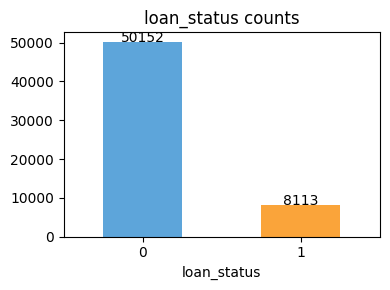

Доля класса 1: 0.139


In [4]:
vc = df['loan_status'].value_counts()
ax = vc.plot(kind='bar', color=['#5DA5DA', '#FAA43A'], rot=0, figsize=(4,3), title='loan_status counts')
for i, v in enumerate(vc.values):
    ax.text(i, v+5, str(v), ha='center')
plt.tight_layout(); plt.show()
print('Доля класса 1:', round((df['loan_status']==1).mean(), 3))

## Числовые признаки: распределения и выбросы

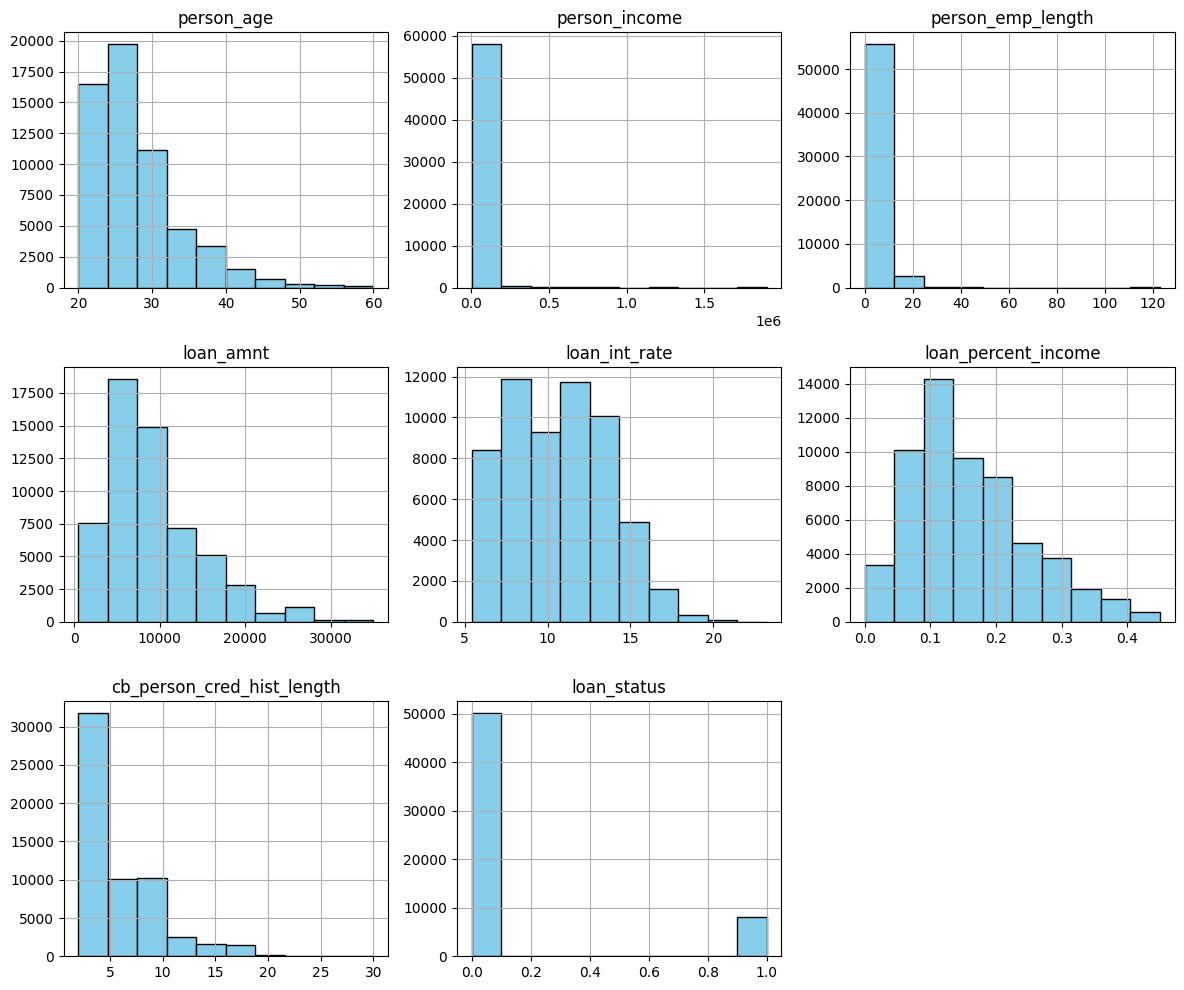

In [6]:
df.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

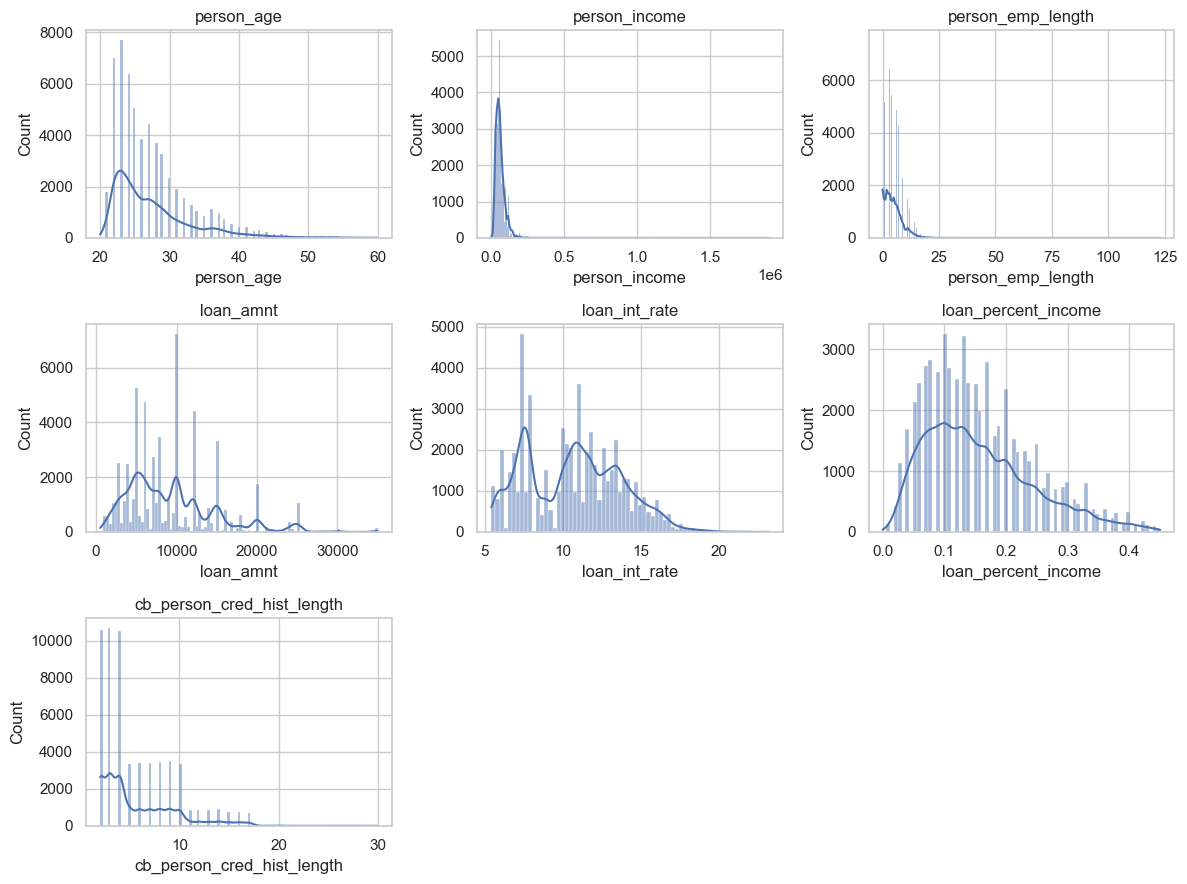

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns.drop('loan_status')
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/3)), ncols=3, figsize=(12, 3*int(np.ceil(len(num_cols)/3))))
axes = axes.ravel()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='#4C72B0')
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(); plt.show()

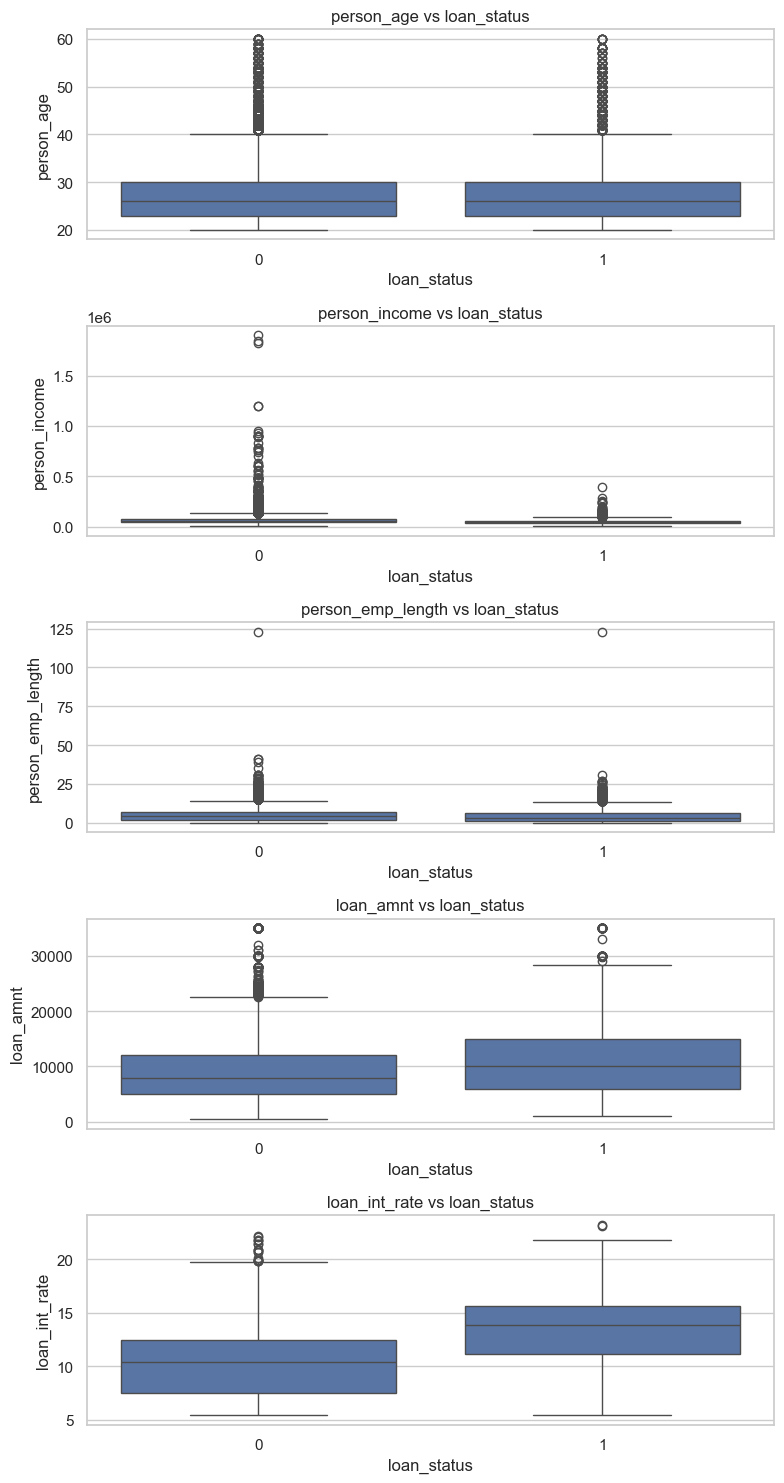

In [ ]:
key_num = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate']
fig, axes = plt.subplots(nrows=len(key_num), ncols=1, figsize=(8, 3*len(key_num)))
for ax, col in zip(axes, key_num):
    sns.boxplot(data=df, x='loan_status', y=col, ax=ax)
    ax.set_title(f'{col} vs loan_status')
plt.tight_layout(); plt.show()


## Категориальные признаки: частоты и средний таргет

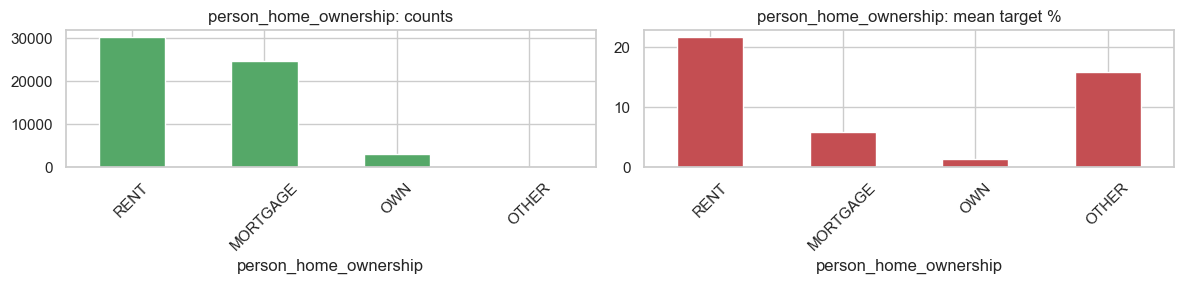

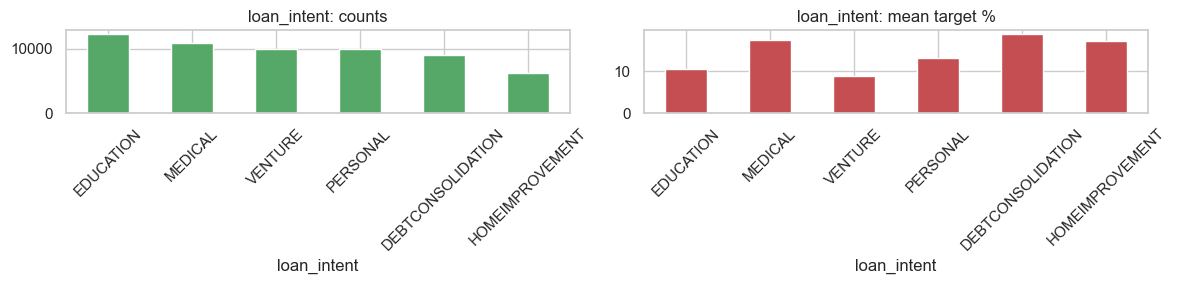

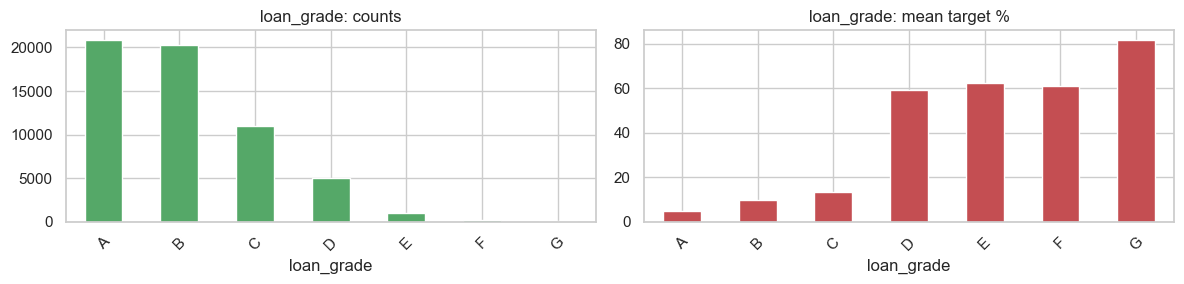

In [ ]:
cat_cols = df.select_dtypes(include=['object','category','string']).columns
show_cols = list(cat_cols)[:3]
for col in show_cols:
    tmp = (df.groupby(col)['loan_status']
             .agg(['count','mean'])
             .sort_values('count', ascending=False)
             .head(12))
    fig, axes = plt.subplots(1,2, figsize=(12,3))
    tmp['count'].plot(kind='bar', ax=axes[0], title=f'{col}: counts', color='#55A868')
    (tmp['mean']*100).plot(kind='bar', ax=axes[1], title=f'{col}: mean target %', color='#C44E52')
    for a in axes: a.tick_params(axis='x', rotation=45)
    plt.tight_layout(); plt.show()

## Корреляции числовых признаков

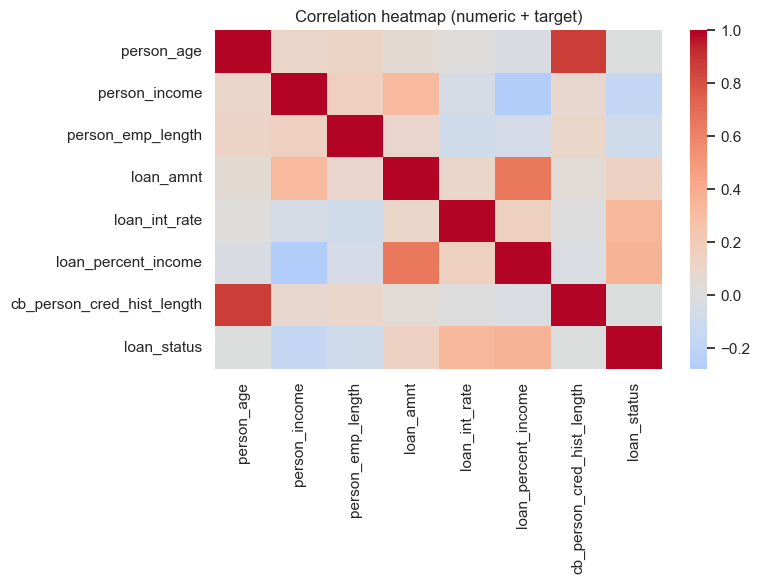

loan_status                   1.000000
loan_percent_income           0.363256
loan_int_rate                 0.339959
loan_amnt                     0.136087
person_age                   -0.001517
cb_person_cred_hist_length   -0.003027
person_emp_length            -0.099074
person_income                -0.165265
Name: loan_status, dtype: float64


In [ ]:
corr = df[num_cols.tolist() + ['loan_status']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation heatmap (numeric + target)')
plt.tight_layout(); plt.show()
print(corr['loan_status'].sort_values(ascending=False).head(10))


## Выводы
- Баланс классов: доля класса 1 = 0.139, что указывает на дисбаланс; используйте balanced_accuracy, PR кривой
- Дообработки числовых фич: логарифм дохода (`person_income`), бининг возраста — уже реализованы в препроцессоре.
- Выбросы: имеем большое количество выбросов по всему датасету, опытным путем пришли к 
```python
    df = df[df['person_age'] <= 60]
    df = df[df['loan_percent_income'] <= 0.45].
```
Что является аккуратным вмешательством в данные, при этом сохраняется наилучшая метрика. 
- Добавление новых признаков привело к снижению метрик.
- Корреляции:  мультиколлинеарность не обраружилась; 